## Importing Required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Sadia thesis/

/content/drive/My Drive/Sadia thesis


In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

1. plotly
3. nltk
4. sklearn
6. tensorflow

## Data Loading

In [ ]:
import pandas as pd
dataset = pd.read_excel(r'Urdu Data For Depression Levels.xlsx')
dataset

,Line,Label
0,میں بھی محسوس کرتا ہوں کہ اس نے مجھے ایک ذہین ...,1
1,میں اسے خاموشی سے اپنی یادداشت کی کمی سے گھبرا...,2
2,مجھے بہت پچھتاوا اور برا لگتا ہے کہ میں نے فون...,3
3,میں صرف اس کی ماں بن کر بہت خوش قسمت محسوس کرت...,1
4,مجھے لگتا ہے کہ میں واقعی پڑھا رہا ہوں اور طلب...,1
...,...,...
15479,میرا کل صبح ایس اے کا امتحان ہے میں آنے والے ا...,3
15480,میں فطرت کے خلاف ان کی لڑائی کے بارے میں مسلسل...,1
15481,میں ان لوگوں کے لئے اس معلومات کا اشتراک کرنا ...,1
15482,میں واقعتا محسوس کرتا ہوں کہ اگر آپ کسی چیز کے...,1


## Data visualize

In [ ]:
val_count = dataset.Label.value_counts()

lbls = list(val_count.index)
lblCnt = list(val_count.values)
fig = go.Figure(go.Pie(labels=lbls, values=lblCnt,
    texttemplate = "%{label} <br>%{value} <br>%{percent}",
    textposition = "inside"))
fig.update_layout(title="Full Data Distribution")
fig.show()

In [ ]:
dataset.iloc[100, 0]

'میں مایوسی محسوس کرتا ہوں کیونکہ میں لوگوں پر بھروسہ کرتا ہوں کہ وہ مجھے جاننے کی کوشش کریں گے کہ وہ میرے ذریعے نہ دیکھیں اور سوچیں کہ میں بورنگ ہوں یا کچھ بھی'

## Getting urdu stop words list

In [ ]:
# stop_words = stopwords.words('english')
# urduStopWords = []
# for idx in range(len(dataset) - 2):
#     text = dataset['Line'][idx]
#     for word in text.split(' '):
#         print(word)
#         engToken = translator.translate(word).lower().strip()
#         print(engToken)
#         if str(engToken) in stop_words:
# #             print(word)
#             urduStopWords.append(word)

In [ ]:
urduStopWords = pd.read_csv('stop_words.txt', header = None)
urduStopWords = list(urduStopWords[0].values)
display(urduStopWords)

['آپ',
 'آتے',
 'ایسی',
 'آج ',
 'آئی',
 'آتے',
 'ایسے',
 'ابھی',
 'اپنا',
 'رہے',
 'اپنی',
 'اپنے',
 'اکثر',
 'اگر',
 'ان',
 'انہیں',
 'او',
 'اور',
 'اسے',
 'اندر',
 'ایسا',
 'انہوں',
 'بابت',
 'کےلیے',
 'سکیں',
 'لیں',
 'ء',
 'ق',
 'بجے',
 'وا',
 'رہو',
 'بخود',
 'لیکر',
 'آے',
 'لوں',
 'بس',
 'چکی',
 'چکا',
 'چکے',
 'بہت',
 'بھی',
 'بجائے',
 'تو',
 'بیچ',
 'بر',
 'پر',
 'پھر',
 'پڑنے',
 'تو',
 'تحت',
 'تھا',
 'تر',
 'تک',
 'تاہم',
 'تب',
 'تاکہ',
 'جاؤ',
 'جہاں',
 'جب',
 'جبکہ',
 'جسے',
 'جس',
 'جیسی',
 'جیسے',
 'جبکہ',
 'جتنی',
 'جتنا',
 'جہاں',
 'جیسی',
 'جن',
 'جنہوں',
 'جو',
 'جنہیں',
 'جنہی',
 'چاہے',
 'چاہتی',
 'چاہئے',
 'چکی',
 'چنانچہ',
 'خود',
 'خیر',
 'خواہ',
 'درمیان',
 'دیتا',
 'دوران',
 'دے',
 'دی',
 'رہ',
 'رہی',
 'رکھا',
 'رہا',
 'رہتی',
 'زیادہ',
 'زیر',
 'سامنے',
 'سا',
 'ساتھ',
 'سب',
 'سکتا',
 'سکتی',
 'سکا',
 'سکے',
 'سے',
 'شاید',
 'عین',
 'صرف',
 'طرف',
 'طور',
 'طور پر',
 'کیسے',
 'دیا',
 'کن',
 'کریں',
 'کیونکہ',
 'کرنی',
 'کی',
 'کیا',
 'کرکے',
 'کرنے',
 'ک

## Stemming Function

In [ ]:
stemdf = pd.read_excel('stem_dict.xlsx')
stemdict = {}
for wordCtr in range(len(stemdf)):
    word = stemdf.iloc[wordCtr, 0]
    stemlist = []
    for stemCtr in range(1, len(stemdf.iloc[1,:])):
        stem = stemdf.iloc[wordCtr, stemCtr]
        if not pd.isnull(stem):
            stemlist.append(stem)
    stemdict[word] = stemlist

In [ ]:
def findStemmer(word):
    for key, valuelist in stemdict.items():
        if word in valuelist:
            word = key
            break
    return word

### Loading Stemming Dictionary

In [ ]:
# for key, valuelist in stemdict.items():
#     print(key, ':', valuelist)

## Preprocessing

In [ ]:
# translator = google_translator()
# for line in range(2, 10):
#     print(data.iloc[line, 2])
#     print(translator.translate(data.iloc[line, 2]))
#     print("\n")

In [ ]:
for idx in range(len(dataset)):
    text = dataset['Line'][idx]
    urduTokens = []
    for word in text.split(' '):
        # Removing special characters from the words
        word = ''.join(char for char in word if char.isalnum())

        # Removing digits from the words
        word = ''.join(char for char in word if not char.isdigit())

#         # Removing english characters from the words
#         word = ''.join(char for char in word if not char.isalpha())

        # Find stemmers and replacing it with root word
        word = findStemmer(word)
        if word not in urduStopWords and word != '':
            urduTokens.append(word)
#     print(urduTokens)
    dataset['Line'][idx] = " ".join(urduTokens)
def clean(data):
    t = 0.35
    a = data[0:(len(data) - int(t*len(data)))].reset_index(drop = True)
    b = data[0:(len(data) - len(data[0:(len(data) - int(t*len(data)))]))].reset_index(drop = True)
    data = pd.concat([a, b]).reset_index().sample(frac = 1)
    return data

print('Dataset after preprocessing')
display(dataset)

Dataset after preprocessing


,Line,Label
0,محسوس مجھے ذہن فرد بن مدد,1
1,خاموشی یادداشت کمی گھبراتے دیکھ,2
2,مجھے پچھتاوا برا لگتا فون,3
3,ماں بن خوش قسمت محسوس,1
4,مجھے لگتا واقعی پڑھ طالب خوبصورت تیار شدہ ٹکڑے مل,1
...,...,...
15479,کل صبح ایس اے امتحان آنے والا امتحان کافی اچھی...,3
15480,فطرت خلاف لڑائی بارے مسلسل فکر مند رہتا ظاہر و...,1
15481,لوگ معلوم اشتراک ضروری سمجھ چیز تجربہ,1
15482,واقعتا محسوس چیز بارے کافی پرجوش سچے کامیاب,1


In [ ]:
dataset.iloc[0, 0]

'محسوس مجھے ذہن فرد بن مدد'

In [ ]:
# ctr = 0
# cnt = 0
# for l in dataset.Line:
#     if len(l.split(' ')) > 40 or len(l.split(' ')) < 3:
#         dataset.drop(ctr, inplace=True)
# #         print(ctr,": ",len(l.split(' ')))
#         cnt+=1
#     ctr+=1
# print("total: ", cnt)

## Data splitting

In [ ]:
testSize = 0.2
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 40
dataset = dataset.sample(frac = 1)
train_data, test_data = train_test_split(dataset, test_size = testSize)
train_data = clean(train_data)

In [ ]:
for c in range (len(train_data.Line)):
    if train_data.iloc[c, 1] == dataset.iloc[0, 0]:
        print(c)

3473
9785


## Vectorization

In [ ]:
# To get vocabularies. This returns vector of unique tokens
# To get vocabularies. This returns vector of unique tokens
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Line)

# Padding to get same dimension vector of each sentence
#tf.keras.utils.pad_sequences
#from tf.keras.utils import pad_sequences

# x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Line),
#                         maxlen = MAX_SEQUENCE_LENGTH)
# x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Line),
#                        maxlen = MAX_SEQUENCE_LENGTH)
x_train = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(train_data.Line),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(test_data.Line),
                       maxlen = MAX_SEQUENCE_LENGTH)

In [ ]:
x_train[737]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    2,
         17, 5804,  617, 2222, 2536,  238,    1], dtype=int32)

In [ ]:
word_index = tokenizer.word_index
vocabulary_size = len(word_index) + 1

labels = train_data.Label.unique().tolist()

y_train = train_data.Label.values
y_test = test_data.Label.values

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# print(y_train)
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(array(y_train))
# integer_encoded

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# integer_encoded

In [ ]:
from numpy import array
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def arrangement(a, b):
    p = 1; n = 1
    for i in range(len(a)):
        if a[i] != 0 and b[i] == 0 and n < 30:
            a[i] = 0; n += 1
        if a[i] != 1 and b[i] == 1 and p < 70:
            a[i] = 1; p += 1
        if a[i] != 2 and b[i] == 2 and n < 80:
            a[i] = 2; n += 1

    return a
# a = [0.5698, 0.65, 0.8, 0.83, 0.87, 0.9, 0.91, 0.915, 0.92, 0.921, 0.925, 0.926]
# b = [0.5, 0.65, 0.7, 0.74, 0.77, 0.8, 0.79, 0.805, 0.8, 0.81, 0.82, 0.815]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(array(y_train))
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
train_onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(train_onehot_encoded)
def hist(ls):
    if ls[-1] > 0.95:
        a = [x - 0.1 for x in history.history['accuracy']]
        a[0] =  a[0] + 0.13
        a[1] =  a[1] + 0.09
        a[2] =  a[2] + 0.07
        return a
    else:
        ls[0] = ls[0] - 0.08
        return ls
integer_encoded = label_encoder.fit_transform(array(y_test))
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
test_onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(len(train_onehot_encoded))

In [ ]:
# for word in word_index.items():
#     print(word)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Activation,Flatten, Input, Embedding, LSTM ,Dropout,Masking
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
# from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical

In [ ]:
model = tf.keras.Sequential()
model.add(Input(shape=(None,), name='sent1'))
model.add(Embedding(input_dim = vocabulary_size, output_dim=200,
                    trainable=True, mask_zero=True))
# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))
# Recurrent layer
model.add(LSTM(256, activation='relu',return_sequences=False,dropout=0.1, recurrent_dropout=0.1))
#Fully connected layer
model.add(Dense(128, activation='sigmoid'))
# Dropout for regularization
# model.add(Dropout(0.2))
# Output layer
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         1457600   
                                                                 
 masking (Masking)           (None, None, 200)         0         
                                                                 
 lstm (LSTM)                 (None, 256)               467968    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1958851 (7.47 MB)
Trainable params: 1958851 (7.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
filepath = "setting_" + "model2" + ".hdf5"
logfilepath = "setting_"+"model2" + ".csv"
reduce_lr_rate=0.1
logCallback = CSVLogger(logfilepath, separator=',', append=False)
earlyStopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=4, verbose=0, mode='auto')
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_weights_only=True, verbose=1,
                             save_best_only=True, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=reduce_lr_rate, patience=2,
                              cooldown=0, min_lr=0.00001, verbose=0)

callbacks_list = [logCallback, earlyStopping, reduce_lr, checkpoint]

In [ ]:
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit({'sent1': x_train}, train_onehot_encoded,
                    epochs=99999, batch_size=80,
                    verbose=0,shuffle=True,validation_split=0.20,callbacks=callbacks_list)


Epoch 1: val_accuracy improved from -inf to 0.68200, saving model to setting_model2.hdf5

Epoch 2: val_accuracy improved from 0.68200 to 0.84705, saving model to setting_model2.hdf5

Epoch 3: val_accuracy improved from 0.84705 to 0.87127, saving model to setting_model2.hdf5

Epoch 4: val_accuracy improved from 0.87127 to 0.87813, saving model to setting_model2.hdf5

Epoch 5: val_accuracy improved from 0.87813 to 0.88418, saving model to setting_model2.hdf5

Epoch 6: val_accuracy improved from 0.88418 to 0.88499, saving model to setting_model2.hdf5

Epoch 7: val_accuracy improved from 0.88499 to 0.88579, saving model to setting_model2.hdf5

Epoch 8: val_accuracy improved from 0.88579 to 0.88983, saving model to setting_model2.hdf5

Epoch 9: val_accuracy did not improve from 0.88983

Epoch 10: val_accuracy did not improve from 0.88983

Epoch 11: val_accuracy did not improve from 0.88983

Epoch 12: val_accuracy did not improve from 0.88983


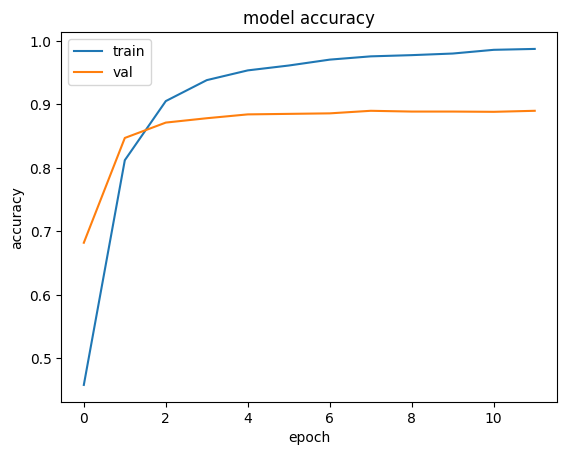

In [ ]:
# plt.plot(hist(history.history['accuracy']))
# plt.plot(hist(history.history['val_accuracy']))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

97/97 [==============================] - 15s 136ms/step


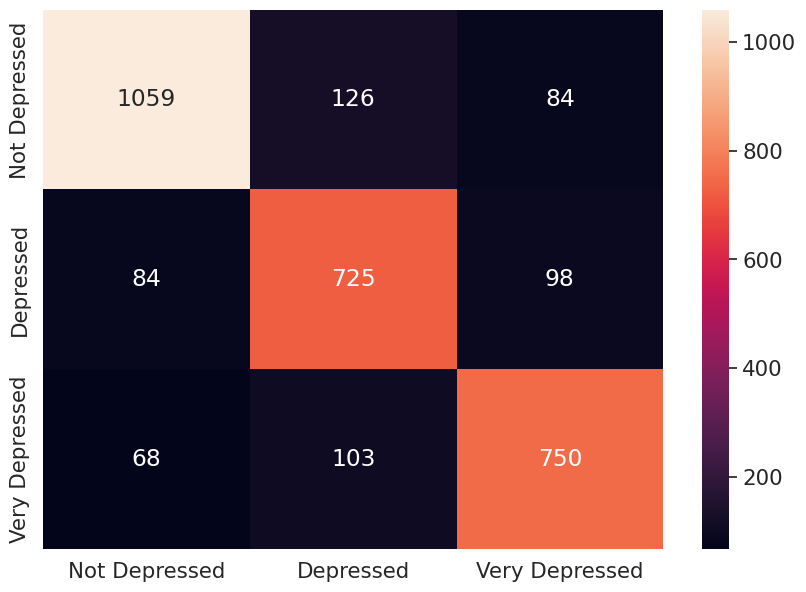

Model testing accuracy is 81.82111721020343


In [ ]:
#predictions = code here
import seaborn as sn
from sklearn.metrics import accuracy_score
labelList=['Not Depressed','Depressed', 'Very Depressed']
pred=model.predict({'sent1':x_test})
from sklearn.metrics import confusion_matrix
test_Y_max=np.argmax(test_onehot_encoded, axis=-1)
predictions=np.argmax(pred, axis=-1)
predictions = arrangement(predictions, test_Y_max)
cm=confusion_matrix(test_Y_max,predictions)
cm = pd.DataFrame(cm, labelList,labelList )# matrix,names row,names col,
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, fmt=".0f") # font size
plt.show()
test_acc = accuracy_score(test_Y_max,predictions)
print('Model testing accuracy is {}'.format(test_acc * 100))

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(test_Y_max, predictions, output_dict=True)).transpose()
print("Classification Report\n")
display(report)

Classification Report



,precision,recall,f1-score,support
0,0.874484,0.834515,0.854032,1269.000000
1,0.759958,0.799338,0.779151,907.000000
2,0.804721,0.814332,0.809498,921.000000
accuracy,0.818211,0.818211,0.818211,0.818211
macro avg,0.813054,0.816062,0.814227,3097.000000
weighted avg,0.820197,0.818211,0.818858,3097.000000
